In [1]:
import scipy.io as spio
from matplotlib import pyplot as plt 
import numpy as np 
from pylab import *

In [142]:
mat = spio.loadmat('/Users/Isabel/Documents/Git/PIC/Working_Folder_Matlab/dust_data_large_Ar_n5V_ts500_vth1500_newBCs2_20x20.mat', squeeze_me= True)


x = mat['x']
y = mat['y']
vx = mat['vx']
vy = mat['vy']
V = mat['phi']
dust = mat['object1']
Ex = mat['efx']
Ey = mat['efy']
q = mat['chg']
rho = mat['den']

# for plotting 

Lx = 0.0015
dh = 1.666666666666667e-04
e = 1.602e-19

# changing font for all plots 

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

#np.set_printoptions(threshold=np.nan)
#rint(V[1:4])
#v = np.concatenate(vx, vy)
print(dust)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Plasma Potential 

A contour plot of the plasma potential after 200 time steps (corresponding to a total run time of approximately 2 microseconds). The x and y axes are normalized. Dashed lines indicate negative values. Notice a wake has formed behind the dust particle. The thermal velocity ($v_{th}$) of the ions was 1500 m/s, ion temperature ($T_i$) was 0.1 eV, and the dust potential was set to -5 V.  

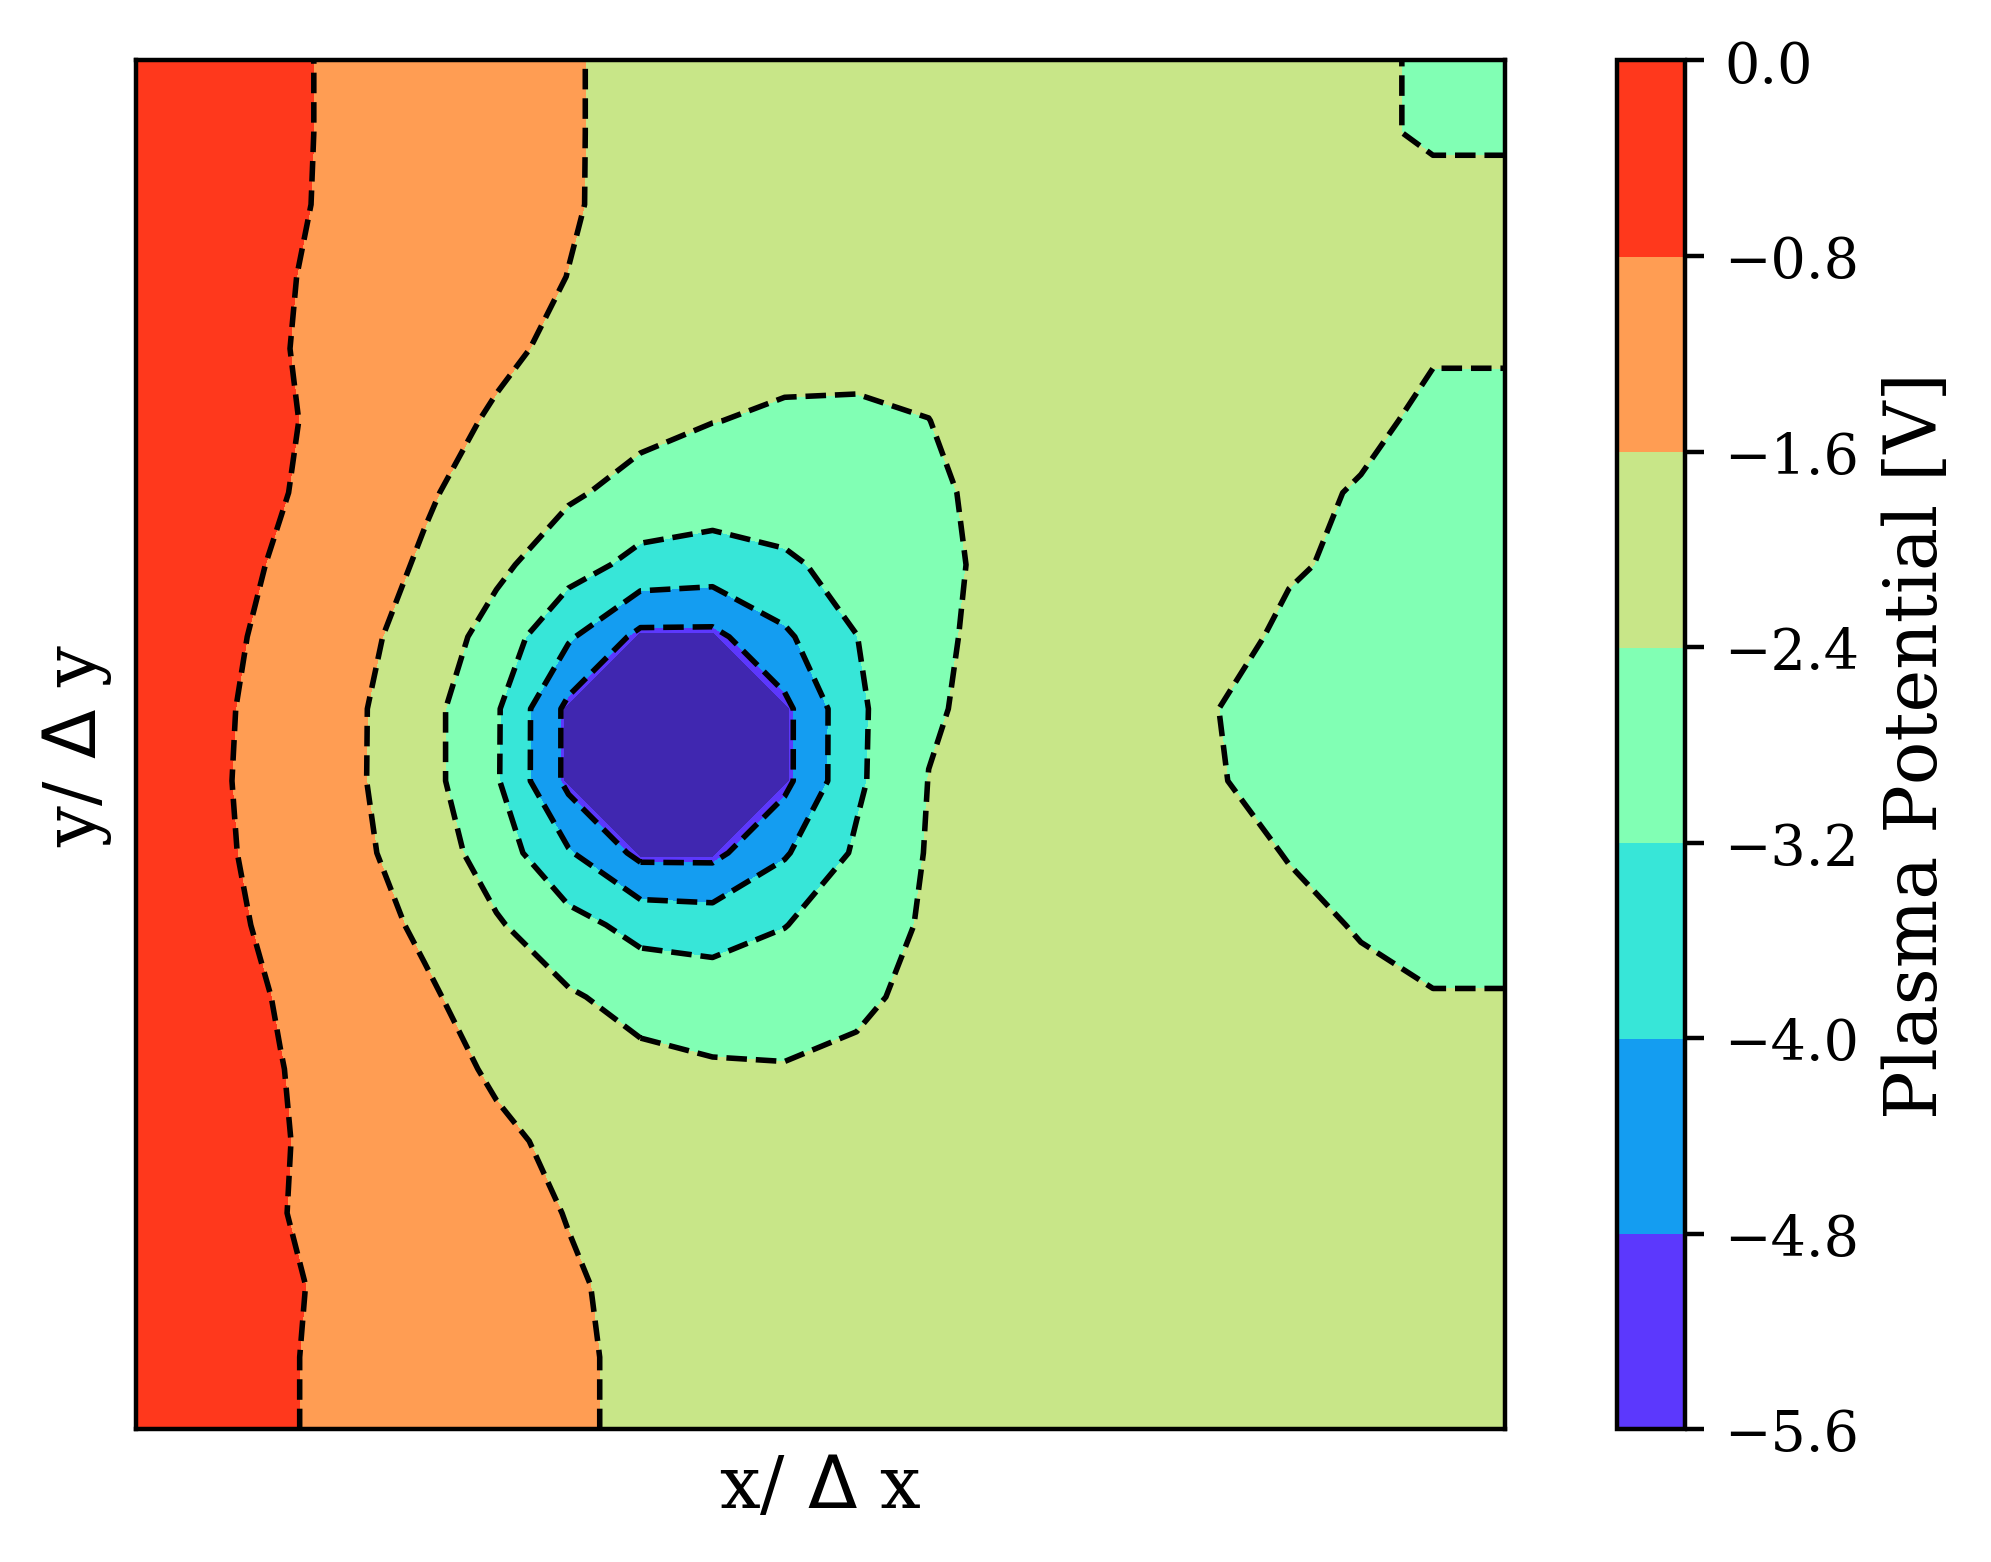

In [161]:
plt.figure(figsize= (6,4), dpi = 200)

VC = plt.contourf(np.transpose(V),cmap=plt.cm.get_cmap('rainbow'))
cb = plt.colorbar()
cb.set_label('Plasma Potential [V]', fontsize = 13)
VC2 = plt.contour(np.transpose(V), colors='k',linewidths= 1)
plt.contourf(np.transpose(dust), [0.95, 1 ], colors ='k', alpha = 0.3)

#manual_locations =  [(4.5, 0.5), (4.5, 1.5), (4.5, 2), (4.5, 2.5)]
# for use with transpose [(0.5, 4.5), (1.5 , 4.5), (2, 4.5), (2.5, 4.5)]
#plt.clabel(VC2, inline=2, fontsize=10, manual=manual_locations , colors='k')

#plt.title('Electric potential', fontsize = 18)
plt.xlabel('x/ $\Delta$ x', fontsize = 13)
plt.xticks([])
plt.ylabel('y/ $\Delta$ y', fontsize = 13) #rotation =0,
plt.yticks([])

plt.imshow(V, extent=[0, 19, 0, 19], origin='lower', alpha=0.75)
plt.axis(aspect='image');

plt.tight_layout()

plt.show()

plt.imsave('potential.png', V)

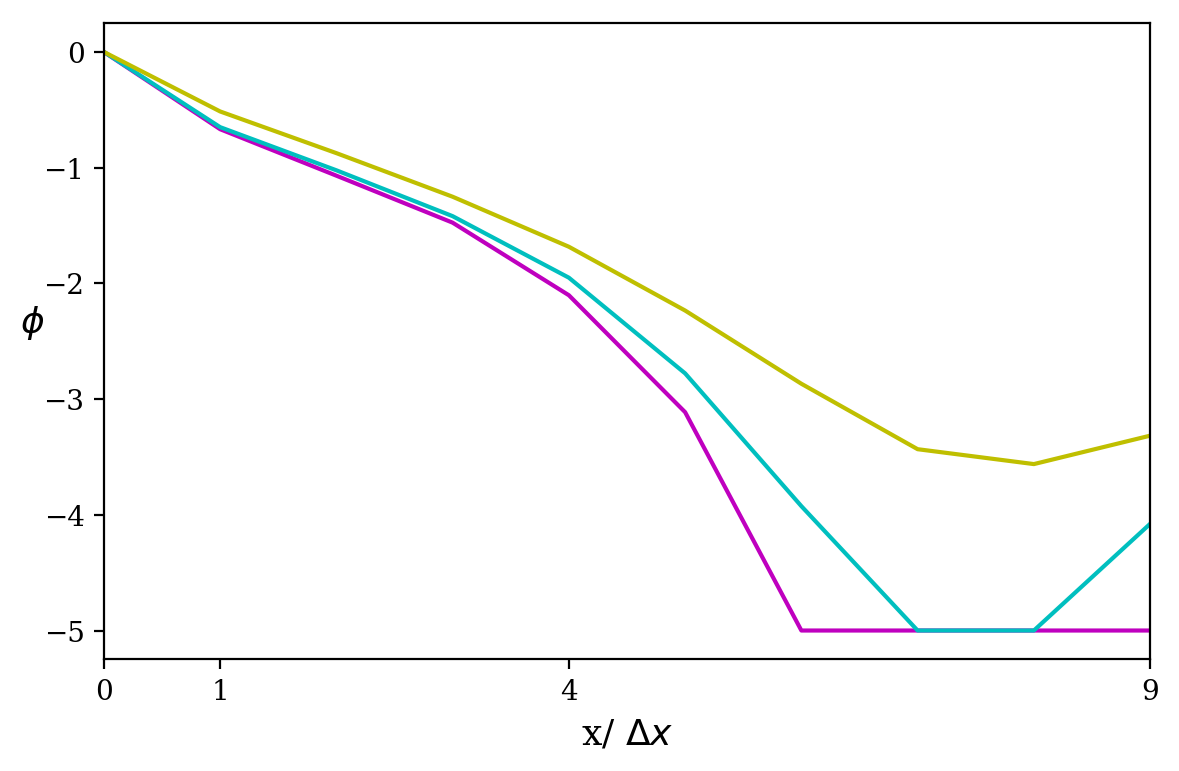

In [4]:
plt.figure(figsize= (6,4), dpi = 100)
plt.plot(V[:,9], 'm-')
plt.plot(V[:,8], 'c-')
plt.plot(V[:,12], 'y-')
plt.xlim(0, 9) 
#plt.title('Electric potential')

plt.xlabel('x/ $\Delta x$', fontsize = 13)
plt.xticks([0, 1, 4, 9])
plt.ylabel('$\phi$', rotation =0, fontsize = 13)
plt.tight_layout()
plt.show()

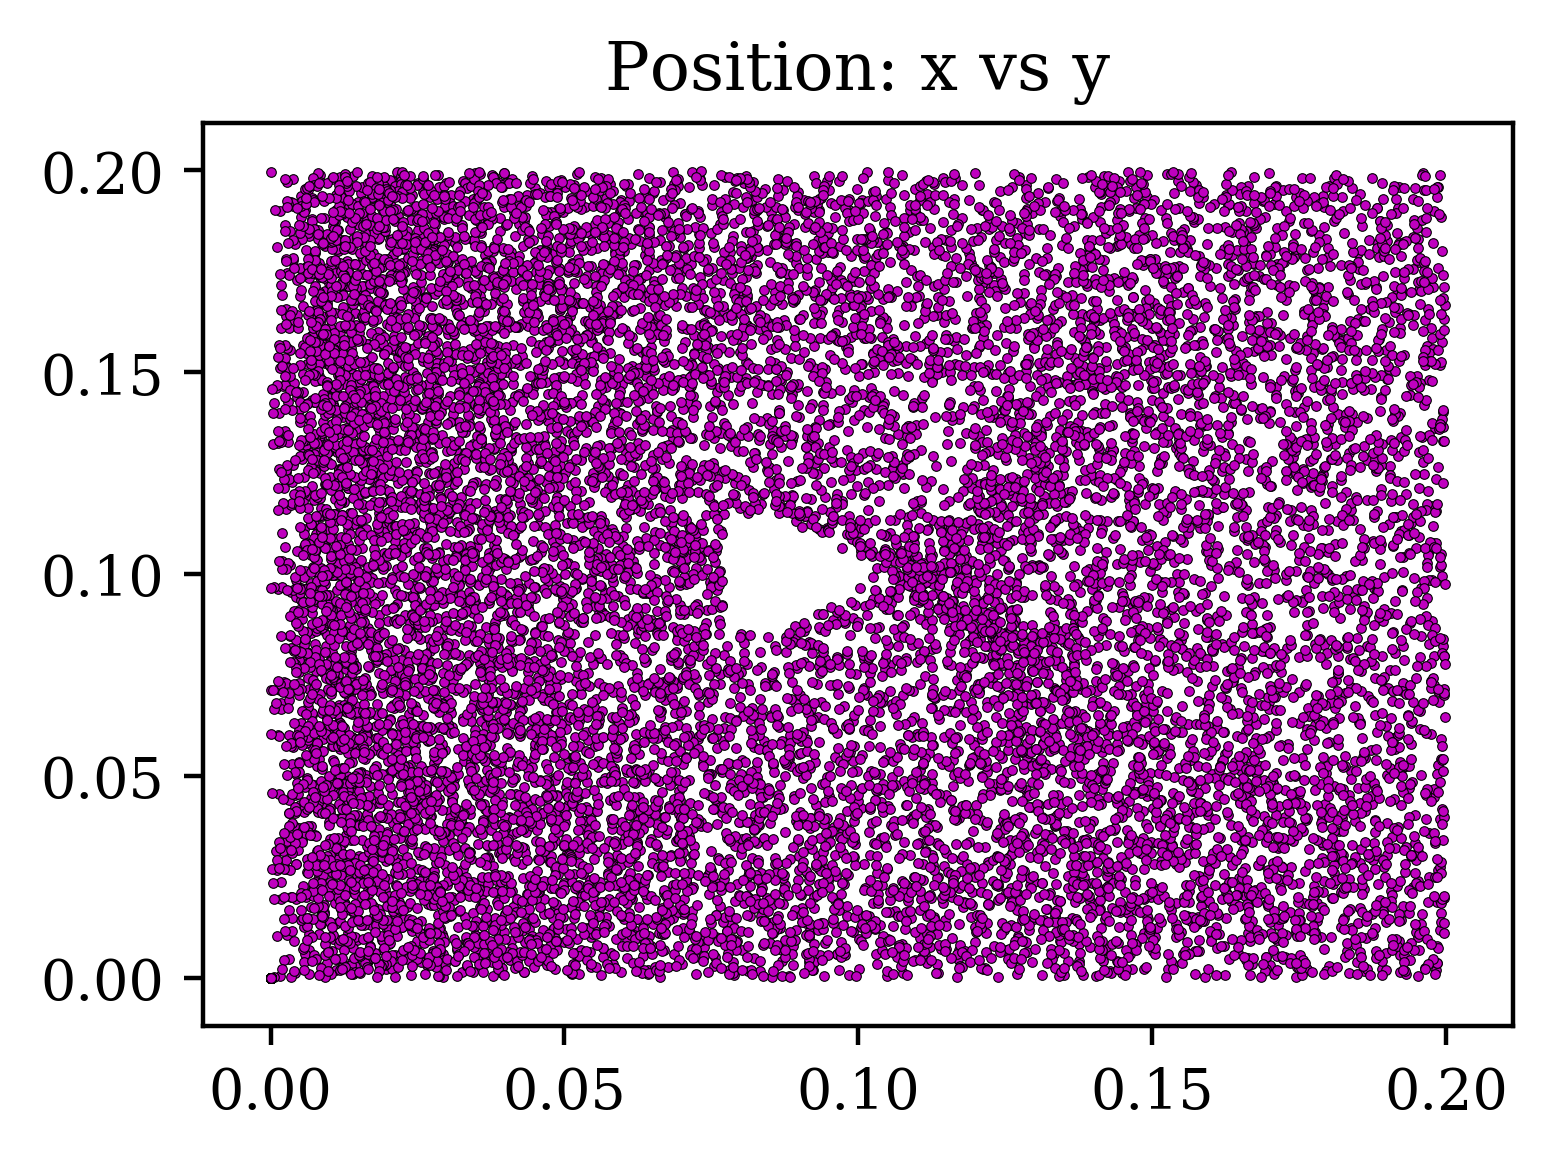

In [23]:
plt.figure(figsize= (4,3), dpi = 200)
plt.scatter(x,y, 3, 'm', edgecolor = 'k', linewidth = 0.2)
plt.title('Position: x vs y')

plt.tight_layout()
plt.show()

## Fig: Ion density 

Contour plot of ion density after 200 time steps (corresponding to a total runtime of approximately __ microseconds). Features of note include a region of high density in front of the dust particle, and a void directly behind the dust partilce where no ions are present. The thermal velocity ($v_{th}$) of the ions was 1500 m/s, ion temperature ($T_i$) was 0.1 eV, and the dust potential was set to -5 V.  

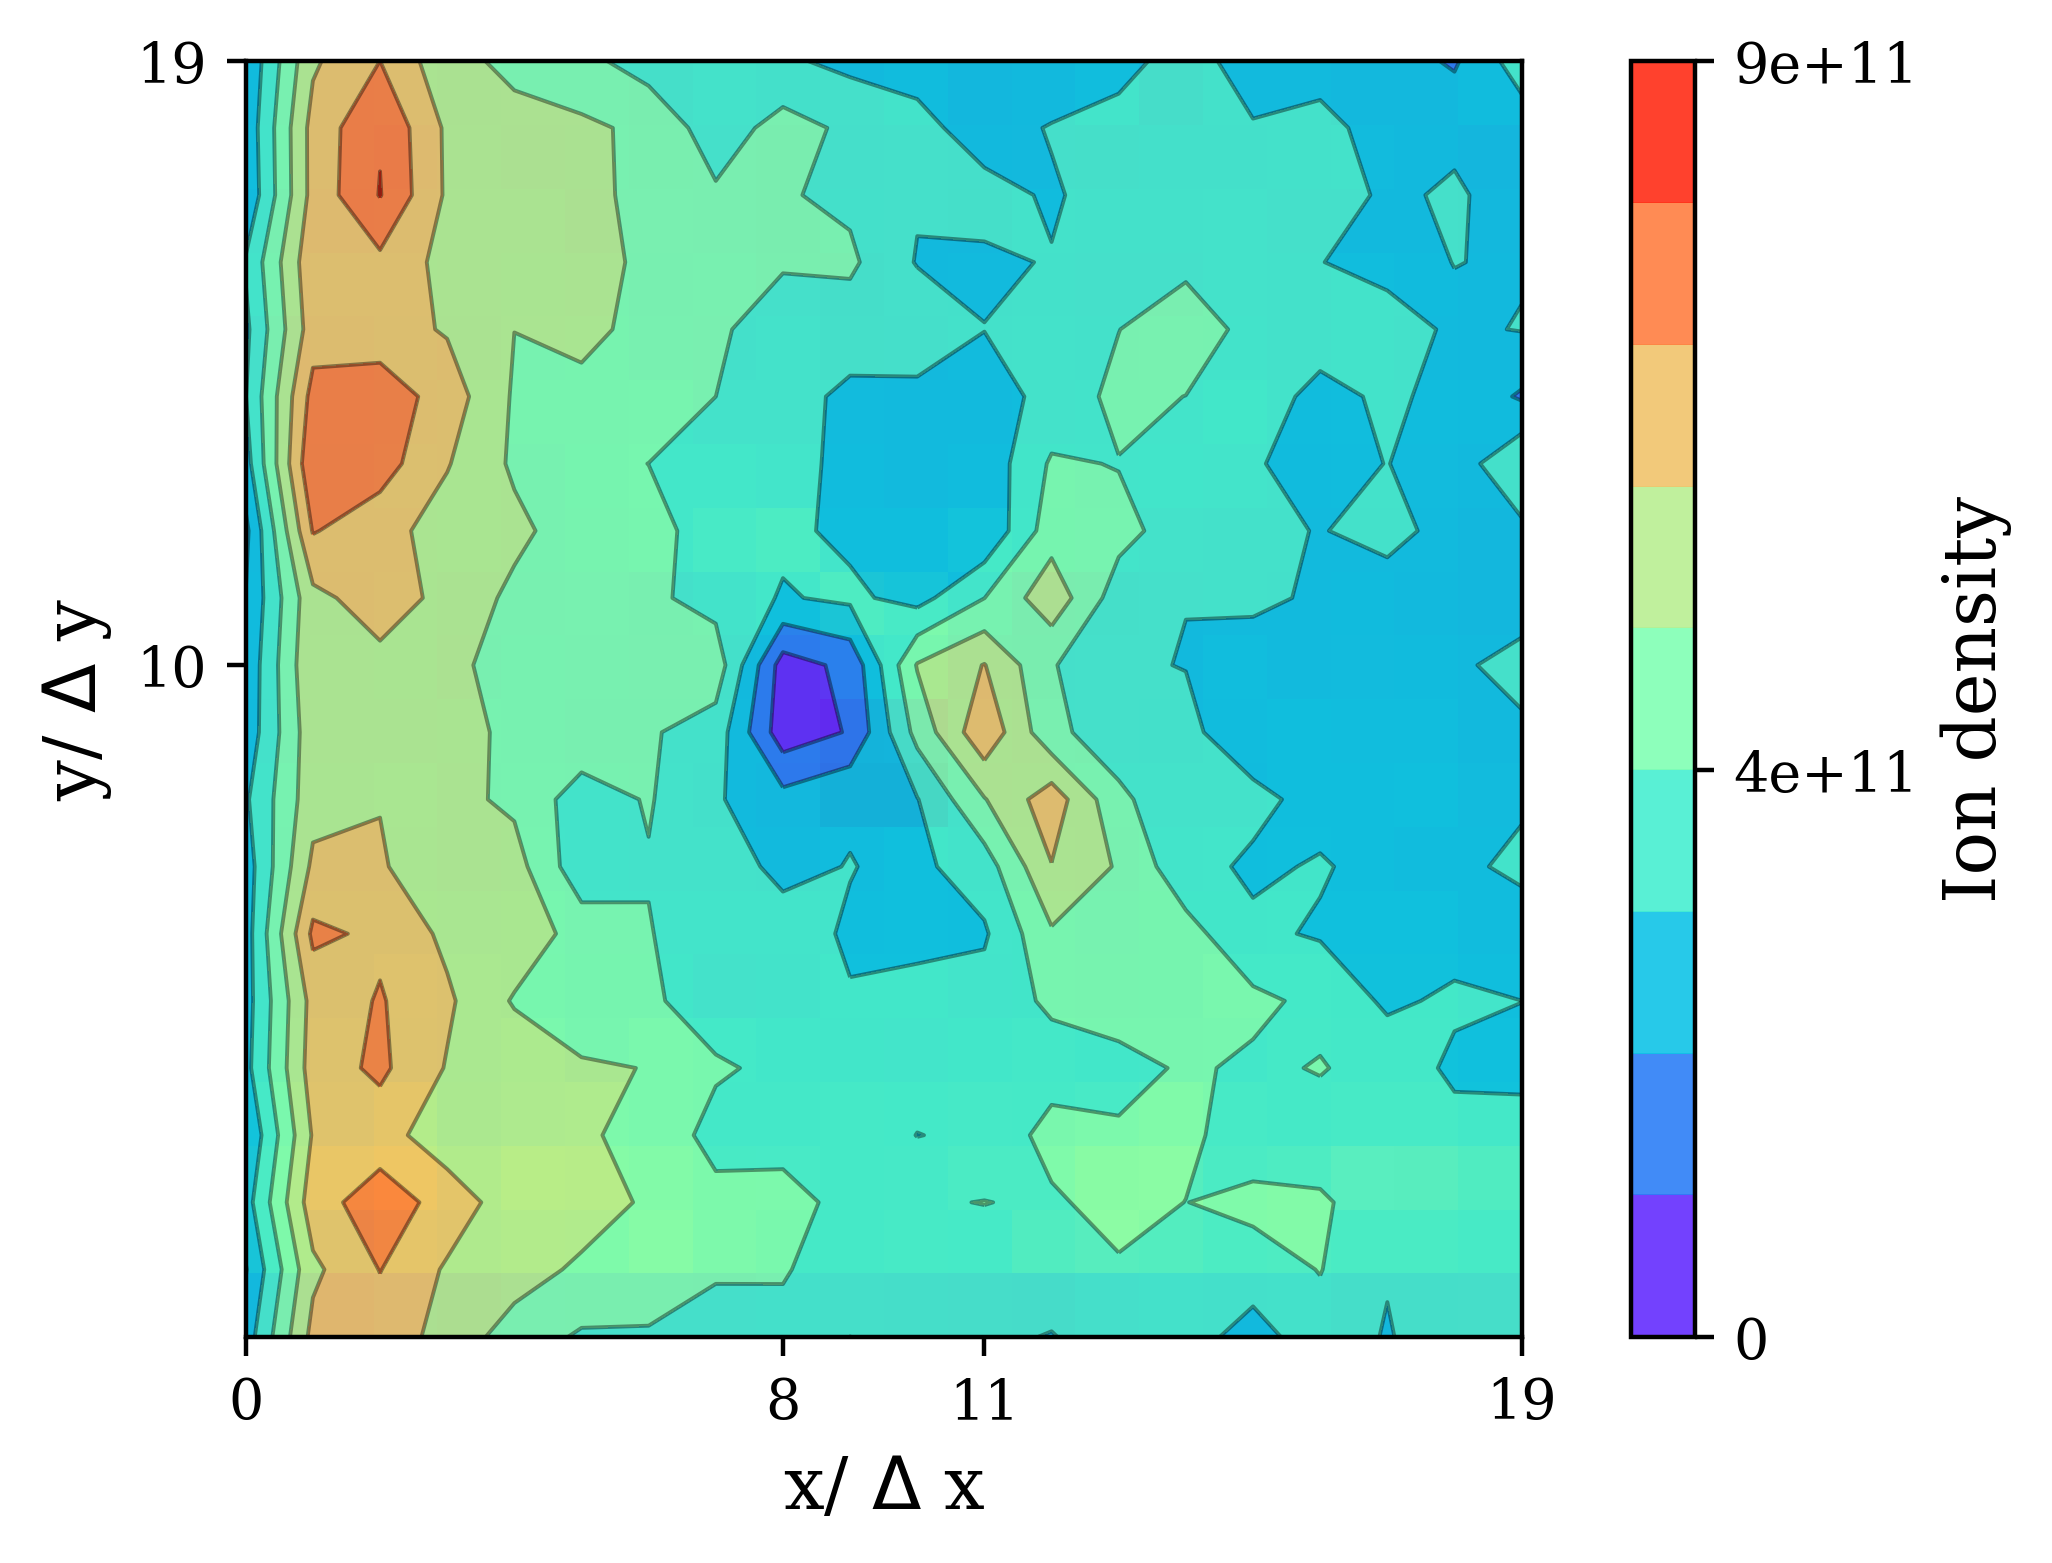

In [164]:
fig = plt.figure(figsize= (6,4), dpi = 200)

#plt.title('Ar+ density', fontsize = 18)
plt.contourf(np.transpose(rho), cmap=plt.cm.get_cmap('rainbow'), alpha = 0.9)  #cmap=plt.cm.get_cmap('plasma')
cbar1 = plt.colorbar()
cbar1.set_label('Ion density', fontsize = 13)
cbar1.set_ticks([0,4e11,9e11])
cbar1.set_ticklabels([0, 4e11, 9e11]) # add the labels
plt.contour(transpose(rho), colors= 'k',linewidths= 0.7, alpha = 0.4)
#plt.contourf(np.transpose(dust), [0.95, 1 ], colors ='k')

plt.xlabel('x/ $\Delta$ x', fontsize = 13)
plt.ylabel('y/ $\Delta$ y', fontsize = 13) #rotation =0,


plt.xticks([0, 8, 11, 19])
plt.yticks([10,19])


plt.imshow(rho, extent=[0, 19, 0, 19], origin='lower')
plt.axis(aspect='image');

plt.tight_layout()

plt.show()

plt.imsave('test_rho.png', rho)

plt.show()


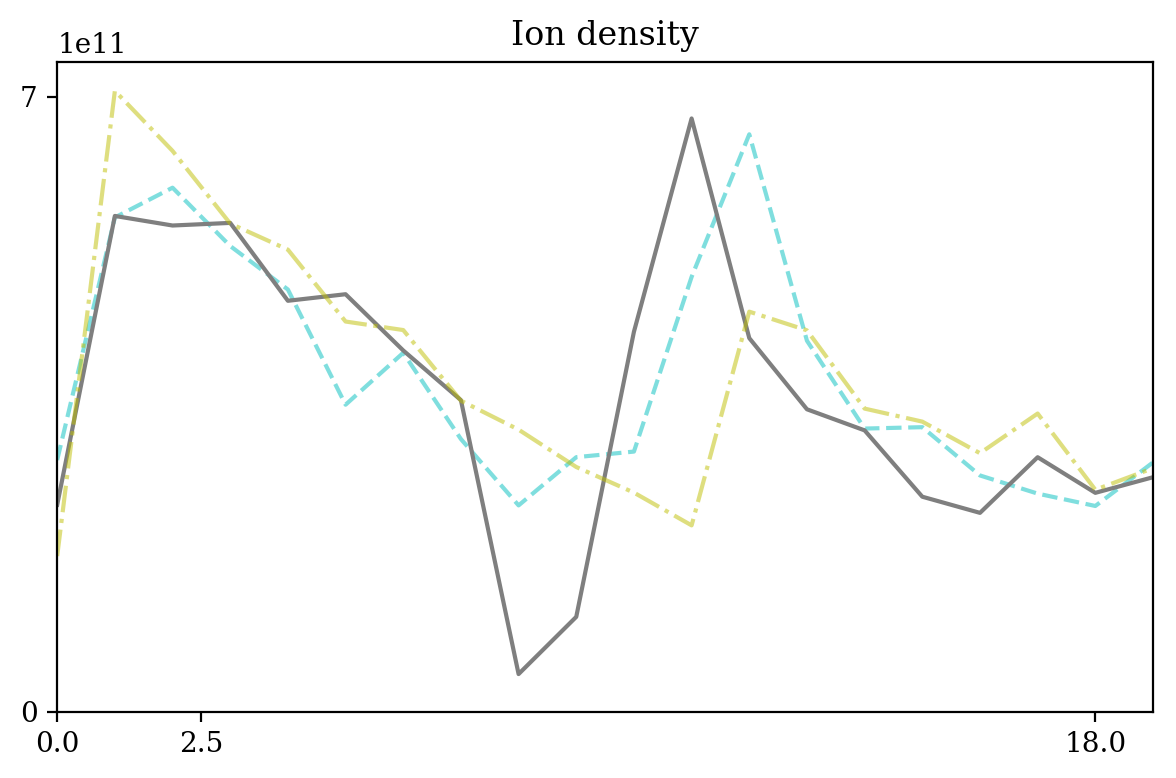

In [154]:
plt.figure(figsize= (6,4), dpi = 100)
#plt.plot(rho[9], 'k.')
plt.plot(rho[:,8], 'c--', alpha = 0.5)
plt.plot(rho[:,9], 'tab:gray')
plt.plot(rho[:,12], 'y-.', alpha = 0.5)
plt.title('Ion density')
plt.xlim([0,19])
plt.xticks([0,2.5, 18])
plt.yticks([0, 7e11])
plt.tight_layout()

plt.show()

## Ex vs x 

Unsure of whether/how to use this plot. 

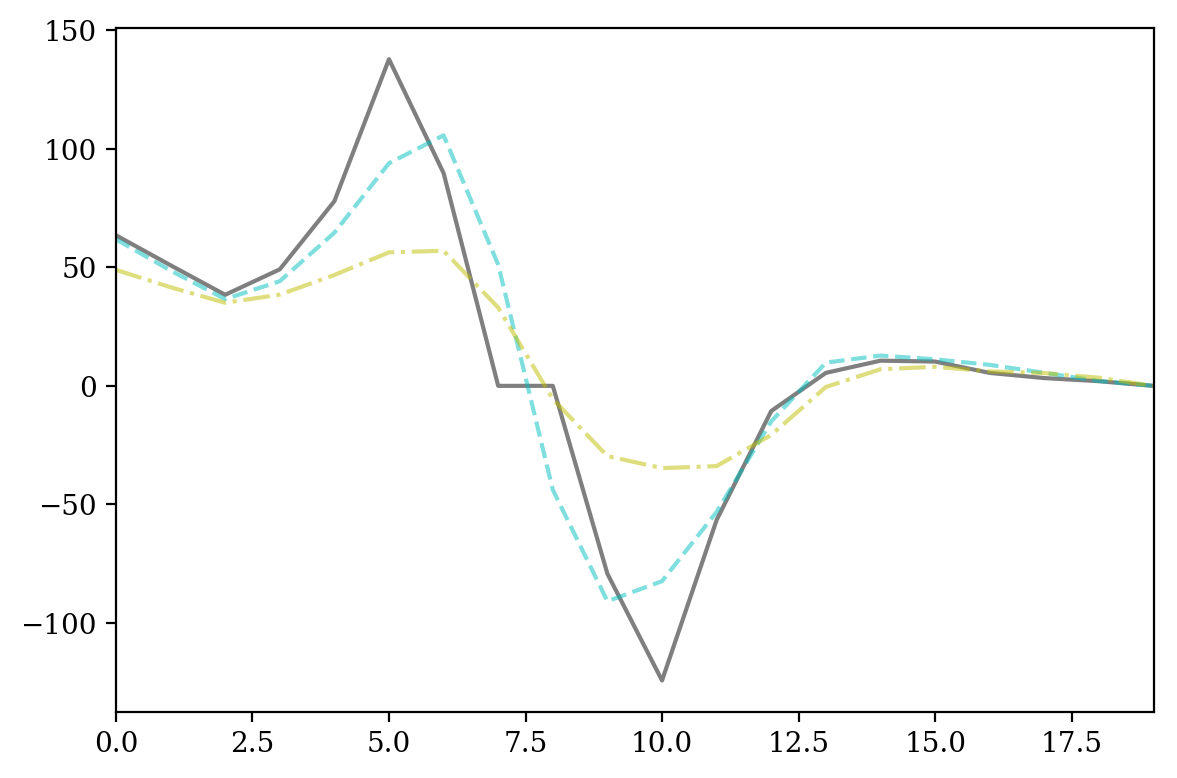

In [27]:
plt.figure(figsize= (6,4), dpi = 100)
plt.plot(Ex[:,9], 'tab:gray')
plt.plot(Ex[:,8], 'c--', alpha = 0.5)
plt.plot(Ex[:,12], 'y-.', alpha = 0.5)
plt.xlim(0, 19) 
#plt.title('Ex vs x')
plt.tight_layout()
plt.show()

## Velocty plot

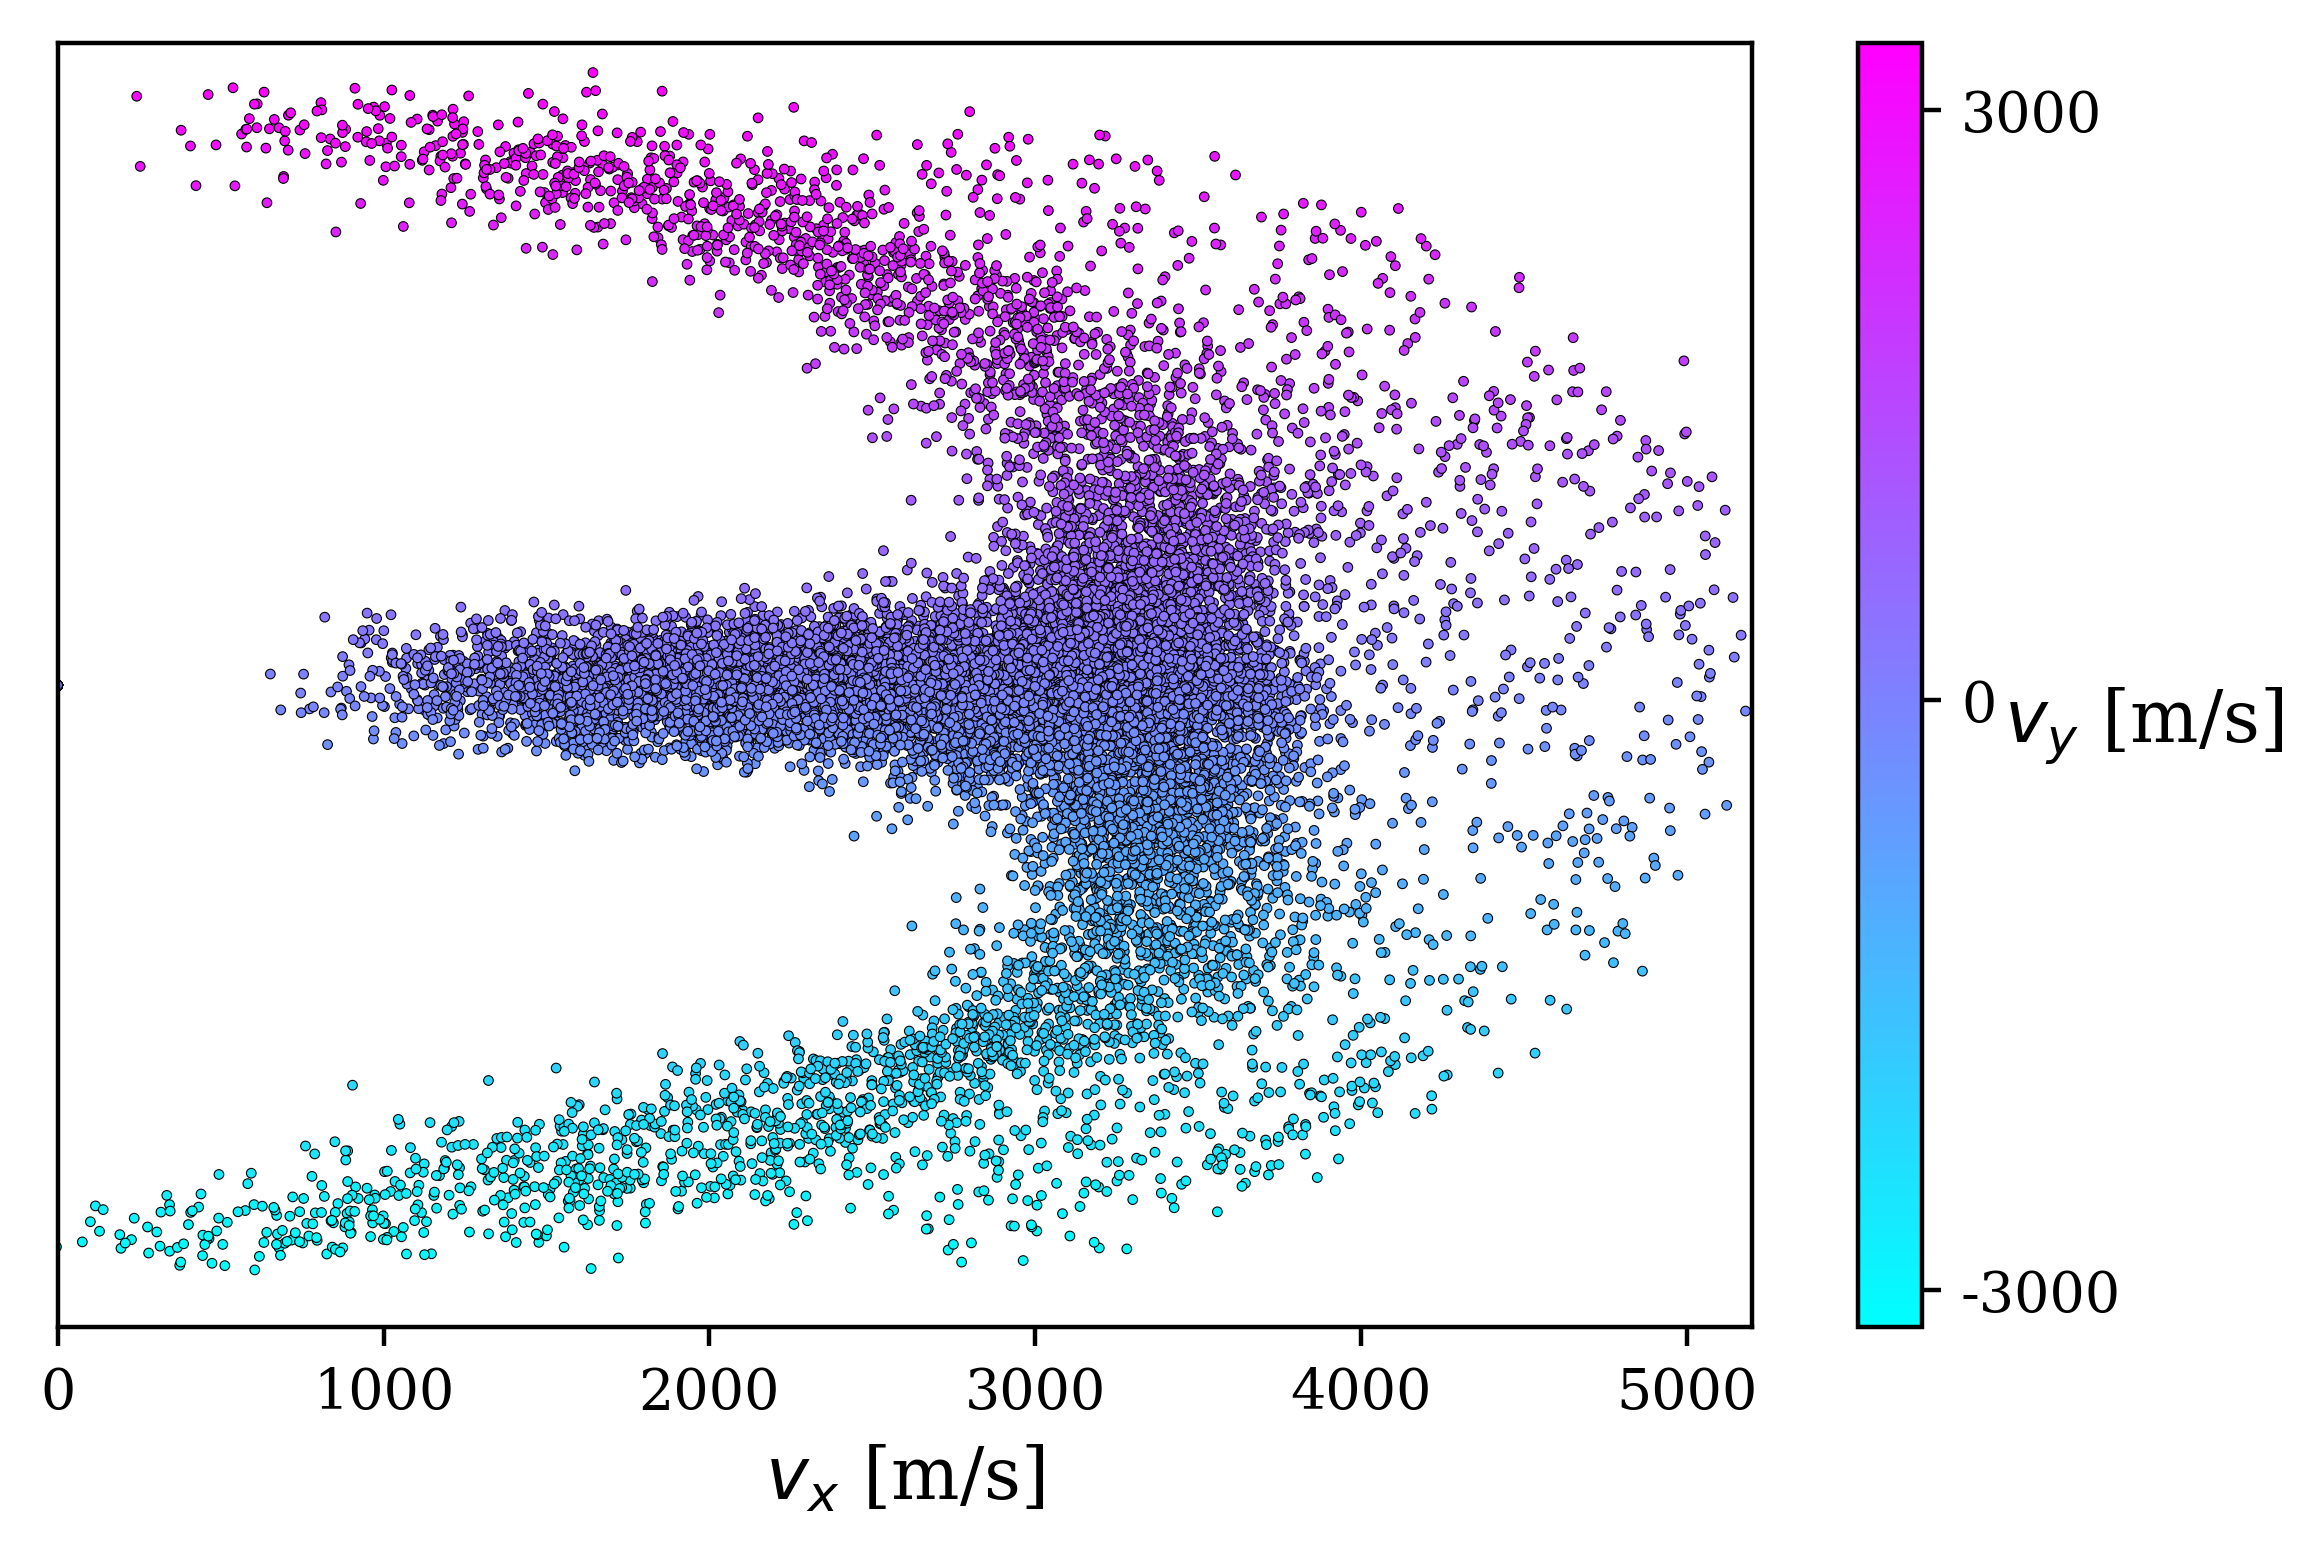

In [9]:
plt.figure(figsize= (6,4), dpi = 200)
plt.scatter(vx, vy, s= 3, c=vy, cmap='cool', edgecolor = 'k', linewidth = 0.2)
cbar = plt.colorbar()
cbar.set_ticks([-3000,0,3000])
cbar.set_ticklabels([-3000,0, 3000]) # add the labels
cbar.set_label('$v_y$ [m/s]', rotation= 0, fontsize = 13)
plt.xlim(0, 5200)
plt.xlabel('$v_x$ [m/s]', fontsize = 13)
plt.ylim(-3500, 3500)
plt.yticks([])

#cbar = colorbar(c = vy, ticks=[-3000, 0, 3000], orientation='horizontal')
#cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.tight_layout()
plt.show()


# MISC

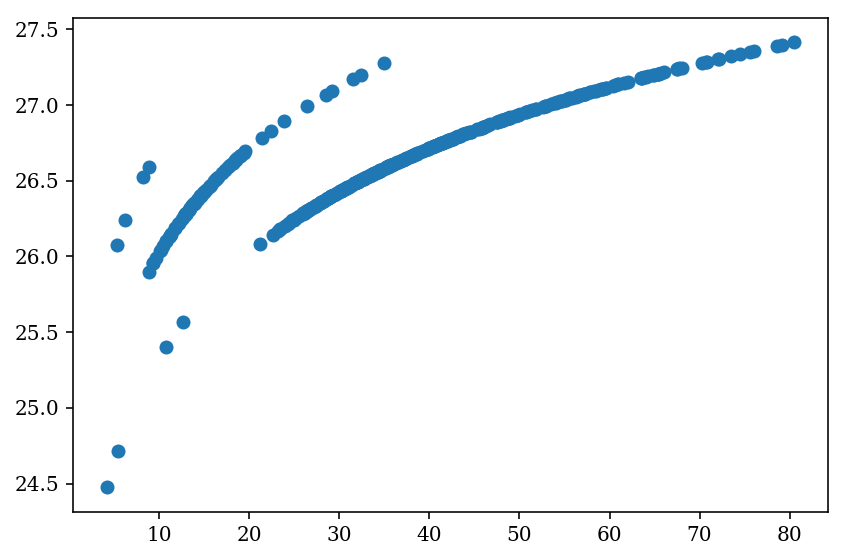

[[ 6.21811137  9.70072348 12.93436298 10.23977984 13.47809625 12.94522617
  12.75602019 12.53235518 14.31850446 11.7704167  11.18400171 10.13710053
   8.85172259 12.95465782 14.8770082  13.94746233 15.49553206 10.81767455
  11.35811121  5.2899289 ]
 [31.48208475 57.8577986  65.44083603 60.9485667  64.79631386 63.54303
  72.11062601 62.09635811 56.25062927 56.42174659 59.0165157  57.29859426
  70.66640164 78.63986781 73.50119981 65.34332621 67.54211812 63.53626085
  63.57135815 29.24482813]
 [32.43597242 70.31827969 75.61780474 64.3198564  72.09604814 70.85586908
  68.05560467 60.9695508  59.63957275 55.33308346 57.16057559 64.9690316
  63.82694982 74.50811604 76.04253069 64.03638809 67.70249664 80.44204673
  79.18971752 35.00458554]
 [28.49664423 58.69209163 66.05521066 53.85036178 59.27776866 61.60987889
  57.77940083 53.55703314 52.99942725 55.63095338 54.48318833 57.17595156
  55.55582108 60.66381799 65.4158774  59.11866103 56.63521952 58.46049293
  58.2434941  26.47186383]
 [22.435

In [101]:
plt.scatter(q, np.log(rho))
plt.tight_layout()
plt.show()

print(q)

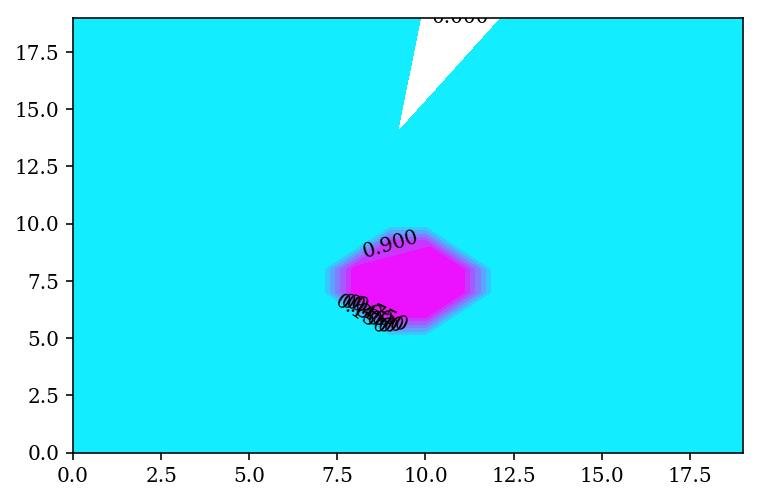

In [11]:
D = plt.contourf(dust,cmap=plt.cm.get_cmap('cool'))
#plt.colorbar

#plt.contour(dust,[1, ], colors = 'k')
#plt.colorbar()
plt.clabel(D, fontsize=10, colors = 'k')
plt.show()

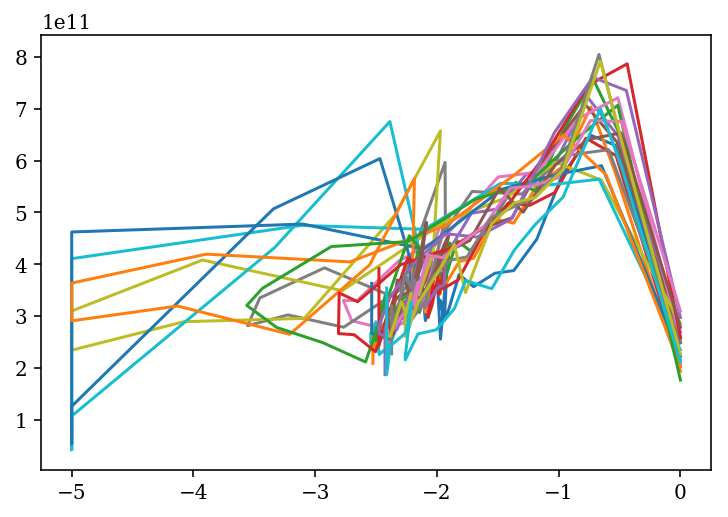

In [140]:
plt.plot(rho)
#plt.plot(rho[:,9])
#plt.xlim([0,18])
plt.show()

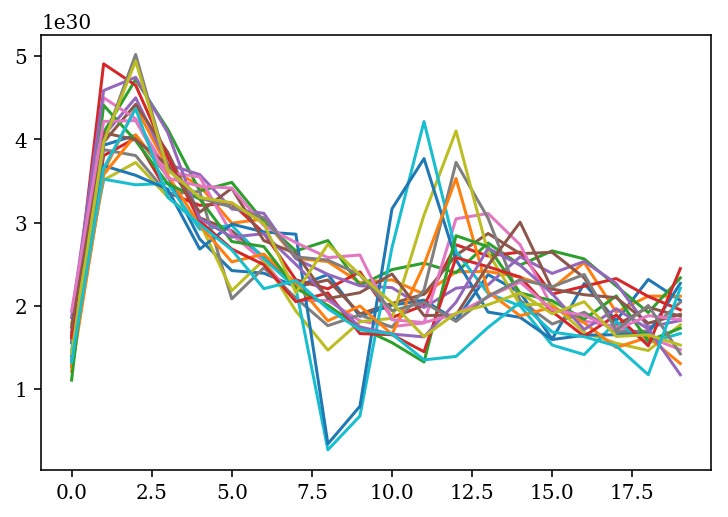

In [145]:
plt.plot(rho/e)
plt.show()

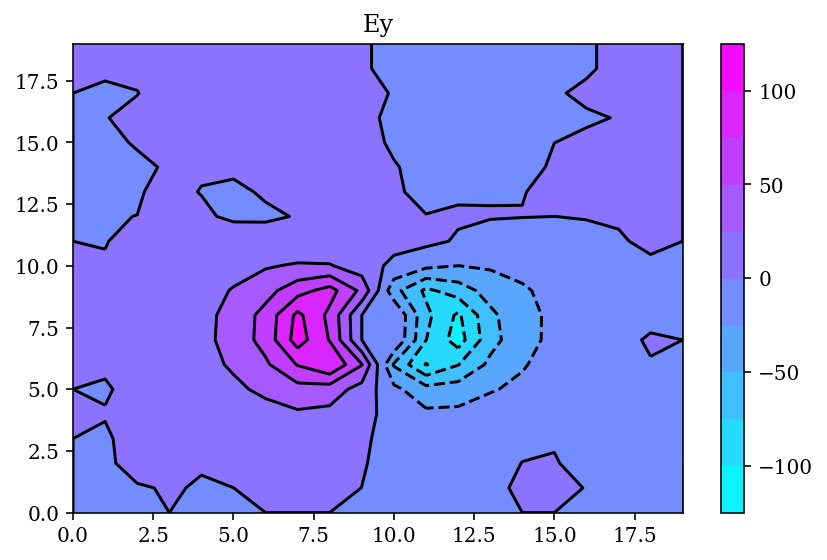

In [12]:
plt.contourf(Ey, 10, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.contour(Ey, 10, colors='k')
#plt.ylim(1, 7)
plt.title('Ey')
plt.tight_layout()
plt.show()

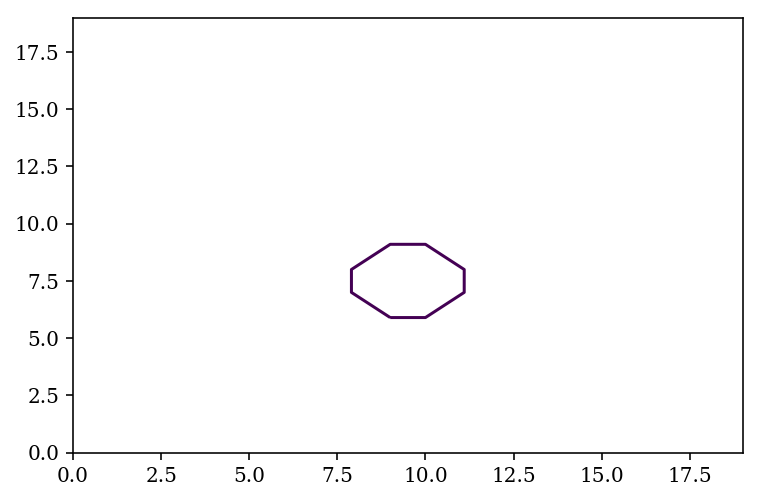

In [13]:
plt.contour(dust, [0.9])
plt.show()